Refer this :  https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen=ImageDataGenerator(rescale=1/255)   #scales (resizes) pixel values in images so they are between 0 and 1

In [3]:
train_data=datagen.flow_from_directory(r"C:\Users\Neha\Downloads\train",
                                      target_size=(416,416),
                                      batch_size=64,
                                      class_mode="categorical")

Found 2040 images belonging to 2 classes.


In [4]:
test_data=datagen.flow_from_directory(r"C:\Users\Neha\Downloads\test",
                                      target_size=(416,416),
                                      batch_size=64,
                                      class_mode="categorical")

Found 484 images belonging to 2 classes.


In [5]:
from tensorflow.keras import models,layers
from tensorflow.keras.optimizers import SGD

The Dropout layer, like Dropout(0.2), is a regularization technique used in neural networks to help prevent overfitting. Overfitting occurs when a model performs very well on training data but poorly on new, unseen data, which means it has learned the specific patterns in the training data too well, including noise.

How Dropout Works
During training, each neuron (node) has a probability of being "dropped out" (i.e., temporarily ignored) for that particular batch.
In your example, Dropout(0.2) means that each neuron has a 20% chance of being ignored (dropped out) in each training pass.
This forces the network to rely on different subsets of neurons during training, which encourages it to learn more robust, generalized patterns rather than just memorizing the training data.

In [6]:
model=models.Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(416,416,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())  #Flatten the input to 1D before passing it to Fully Connected Layers

model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(2,activation='softmax'))

model.compile(optimizer="SGD",loss='categorical_crossentropy',metrics=['accuracy'])


C:\Users\Neha\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 414, 414, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 207, 207, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 205, 205, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 102, 102, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 748,762 (2.86 MB)

 Trainable params: 748,762 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history=model.fit(train_data,epochs=5)

Epoch 1/5


C:\Users\Neha\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 435s 13s/step - accuracy: 0.8591 - loss: 0.5728
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 426s 13s/step - accuracy: 0.8550 - loss: 0.4561
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 426s 13s/step - accuracy: 0.8573 - loss: 0.4452
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 485s 15s/step - accuracy: 0.8626 - loss: 0.4292
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 479s 14s/step - accuracy: 0.8673 - loss: 0.4172


In [9]:
test_loss,test_accuracy=model.evaluate(test_data)
print(test_loss)
print(test_accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5040 - loss: 1.0453
1.0217578411102295
0.5165289044380188


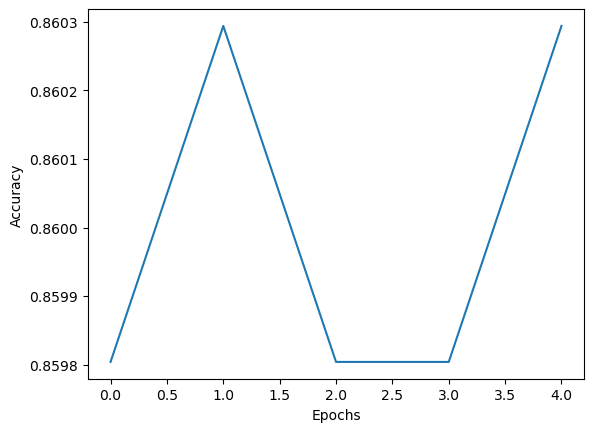

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

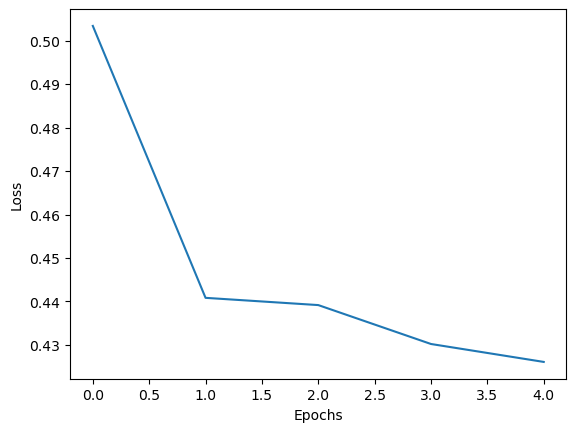

In [13]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

The train_data object, created by ImageDataGenerator's flow_from_directory, is a batch generator. This means it loads images in batches rather than all at once, which helps when working with large datasets. Here’s how the indexing works:

Structure of train_data
Each batch generated by train_data is a tuple with two parts:

train_data[0][0]: The images in the batch.
train_data[0][1]: The labels for those images.

In [16]:
train_data[0][1]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [17]:
train_data[0][0]

array([[[[0.38431376, 0.38431376, 0.38431376],
         [0.38431376, 0.38431376, 0.38431376],
         [0.3803922 , 0.3803922 , 0.3803922 ],
         ...,
         [0.73333335, 0.73333335, 0.73333335],
         [0.7254902 , 0.7254902 , 0.7254902 ],
         [0.7137255 , 0.7137255 , 0.7137255 ]],

        [[0.37647063, 0.37647063, 0.37647063],
         [0.37254903, 0.37254903, 0.37254903],
         [0.37254903, 0.37254903, 0.37254903],
         ...,
         [0.73333335, 0.73333335, 0.73333335],
         [0.73333335, 0.73333335, 0.73333335],
         [0.7137255 , 0.7137255 , 0.7137255 ]],

        [[0.37254903, 0.37254903, 0.37254903],
         [0.36862746, 0.36862746, 0.36862746],
         [0.3647059 , 0.3647059 , 0.3647059 ],
         ...,
         [0.7372549 , 0.7372549 , 0.7372549 ],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.72156864, 0.72156864, 0.72156864]],

        ...,

        [[0.07450981, 0.07450981, 0.07450981],
         [0.07058824, 0.07058824, 0.07058824]

6
[0. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Actual Value : 1
Predicted Value : 1


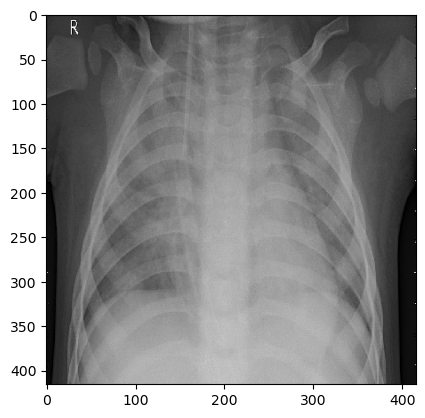

In [24]:
import random
import numpy as np

n=random.randint(0,len(test_data)-1)
print(n)

plt.imshow(test_data[0][0][n])
print(test_data[0][1][n])
image = np.expand_dims(test_data[0][0][n], axis=0)
predicted_value=model.predict(image)

print("Actual Value :", np.argmax(test_data[0][1][n]))
print("Predicted Value :", np.argmax(predicted_value[0]))